In [1]:
import sys
sys.path.append('../src/')

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import mrcutils
#help(mrcutils)

### 1. split mrcs in set of mrc files

In [3]:
mrcs_dir='/Users/fpoitevi/gdrive/cryoEM/Projects/2016-rib70s-F20/data/RawData/Nov10-2016/'
mrcskey ='70S_apo_11102016_stack0001_movie'
mrcsname=mrcskey+'.mrcs'
mrcsfile=mrcs_dir+mrcsname

In [ ]:
! source activate eman-env; `which e2proc2d.py` $mrcsfile $mrcsname --unstacking ; conda deactivate

In [ ]:
! for mrcs in *.mrcs; do mv $mrcs tmp/${mrcs%.*}.mrc ; done

In [ ]:
#! ls *

### 2. load in array

In [4]:
nframe=50
for iframe in np.arange(nframe):
    mrcfile='./tmp/'+mrcskey+'-'+str(iframe+1).zfill(2)+'.mrc'
    #print(mrcfile)
    if iframe == 0:
        frame = mrcutils.mrc2array(mrcfile)
    else:
        frame = np.append(frame, mrcutils.mrc2array(mrcfile), axis=0)
data = frame.reshape(nframe,int(frame.shape[0]/nframe),frame.shape[1])

Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size:  (3838, 3710)
Image size: 

In [5]:
data = data[:,0:np.minimum(data.shape[1],data.shape[2]),0:np.minimum(data.shape[1],data.shape[2])]

In [6]:
data.shape

(50, 3710, 3710)

### 3. Now for some fun

In [8]:
data_psd = data
for i in np.arange(data.shape[0]):
    data_psd[i,...] = mrcutils.psd(data[i,...])

In [9]:
for i in np.arange(data.shape[0]):
    mrcutils.create_mrc(mrcfile_out='movie_psd/frame_'+str(i)+'_psd.mrc',signal_data=data_psd[i,...],noise_data=data_psd[i,...])

... about to write  movie_psd/frame_0_psd.mrc
... about to write  movie_psd/frame_1_psd.mrc
... about to write  movie_psd/frame_2_psd.mrc
... about to write  movie_psd/frame_3_psd.mrc
... about to write  movie_psd/frame_4_psd.mrc
... about to write  movie_psd/frame_5_psd.mrc
... about to write  movie_psd/frame_6_psd.mrc
... about to write  movie_psd/frame_7_psd.mrc
... about to write  movie_psd/frame_8_psd.mrc
... about to write  movie_psd/frame_9_psd.mrc
... about to write  movie_psd/frame_10_psd.mrc
... about to write  movie_psd/frame_11_psd.mrc
... about to write  movie_psd/frame_12_psd.mrc
... about to write  movie_psd/frame_13_psd.mrc
... about to write  movie_psd/frame_14_psd.mrc
... about to write  movie_psd/frame_15_psd.mrc
... about to write  movie_psd/frame_16_psd.mrc
... about to write  movie_psd/frame_17_psd.mrc
... about to write  movie_psd/frame_18_psd.mrc
... about to write  movie_psd/frame_19_psd.mrc
... about to write  movie_psd/frame_20_psd.mrc
... about to write  mov

In [10]:
for i in np.arange(1,data.shape[0]+1):
    data_average = np.mean(data[0:i,...],axis=0)
    psd_average  = mrcutils.psd(data_average)
    mrcutils.create_mrc(mrcfile_out='movie_psd/mean_'+str(i)+'_psd.mrc',signal_data=psd_average,noise_data=psd_average)

... about to write  movie_psd/mean_1_psd.mrc
... about to write  movie_psd/mean_2_psd.mrc
... about to write  movie_psd/mean_3_psd.mrc
... about to write  movie_psd/mean_4_psd.mrc
... about to write  movie_psd/mean_5_psd.mrc
... about to write  movie_psd/mean_6_psd.mrc
... about to write  movie_psd/mean_7_psd.mrc
... about to write  movie_psd/mean_8_psd.mrc
... about to write  movie_psd/mean_9_psd.mrc
... about to write  movie_psd/mean_10_psd.mrc
... about to write  movie_psd/mean_11_psd.mrc
... about to write  movie_psd/mean_12_psd.mrc
... about to write  movie_psd/mean_13_psd.mrc
... about to write  movie_psd/mean_14_psd.mrc
... about to write  movie_psd/mean_15_psd.mrc
... about to write  movie_psd/mean_16_psd.mrc
... about to write  movie_psd/mean_17_psd.mrc
... about to write  movie_psd/mean_18_psd.mrc
... about to write  movie_psd/mean_19_psd.mrc
... about to write  movie_psd/mean_20_psd.mrc
... about to write  movie_psd/mean_21_psd.mrc
... about to write  movie_psd/mean_22_psd.m

In [94]:
from scipy import ndimage
dx,dy = data[0,...].shape
ixy = int(dx/2)
Nxy = 100
radial_mean = np.zeros((data.shape[0],Nxy))
for i in np.arange(1,data.shape[0]+1):
    data_average = np.mean(data[0:i,ixy-Nxy:ixy+Nxy,ixy-Nxy:ixy+Nxy],axis=0)
    psd_average  = mrcutils.psd(data_average)
    sx, sy = psd_average.shape
    X, Y = np.ogrid[0:sx, 0:sx]
    r = np.hypot(X - sx/2, Y - sx/2)
    rbin = (Nxy* r/r.max()).astype(np.int)
    radial_mean[i-1,...] = ndimage.mean(psd_average, labels=rbin, index=np.arange(1, rbin.max() +1)) 

In [95]:
diff_radial_mean = np.zeros(radial_mean.shape)
for i in np.arange(0,data.shape[0]-1):
    diff_radial_mean[i,...] = radial_mean[i+1,...]-radial_mean[i,...]
    #plt.plot(radial_mean[i+1,0:40]-radial_mean[i,0:40])

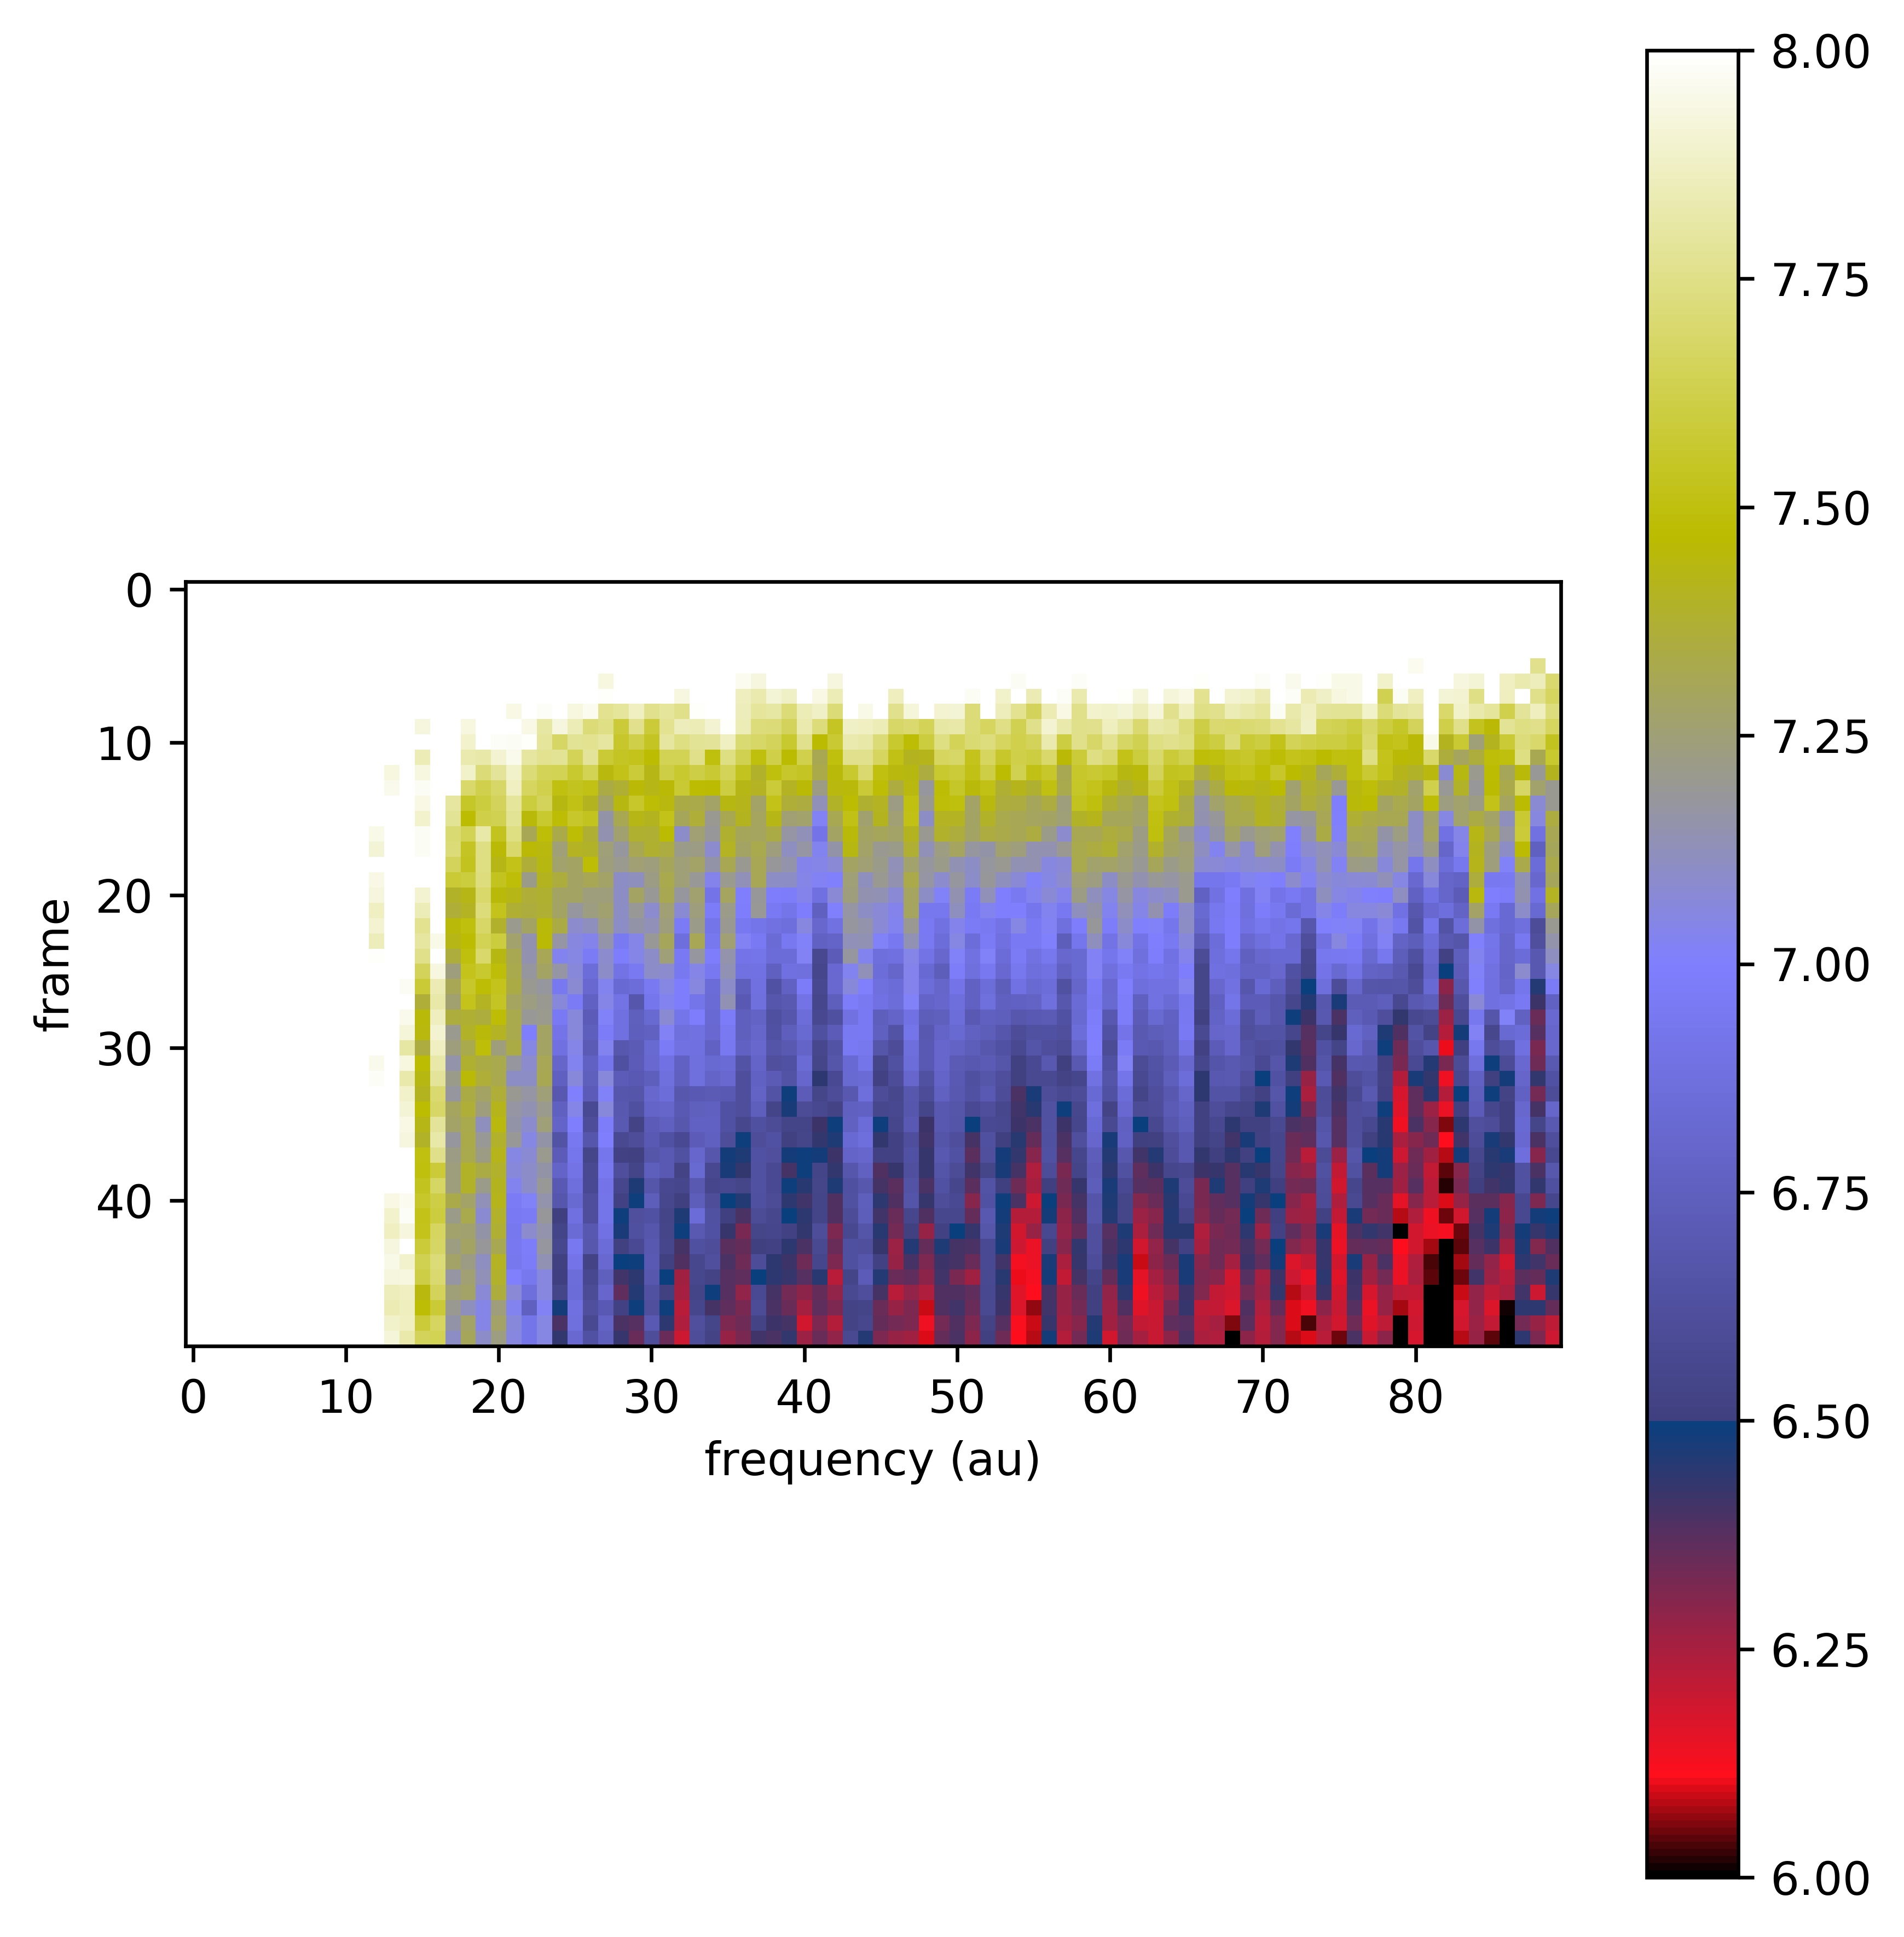

In [115]:
fig = plt.figure(figsize=(6,6),dpi=600)
plt.xlabel('frequency (au)')
plt.ylabel('frame')
plt.imshow(radial_mean[:,0:90],vmin=6,vmax=8,cmap='gist_stern')
plt.colorbar()
plt.tight_layout()
plt.show()

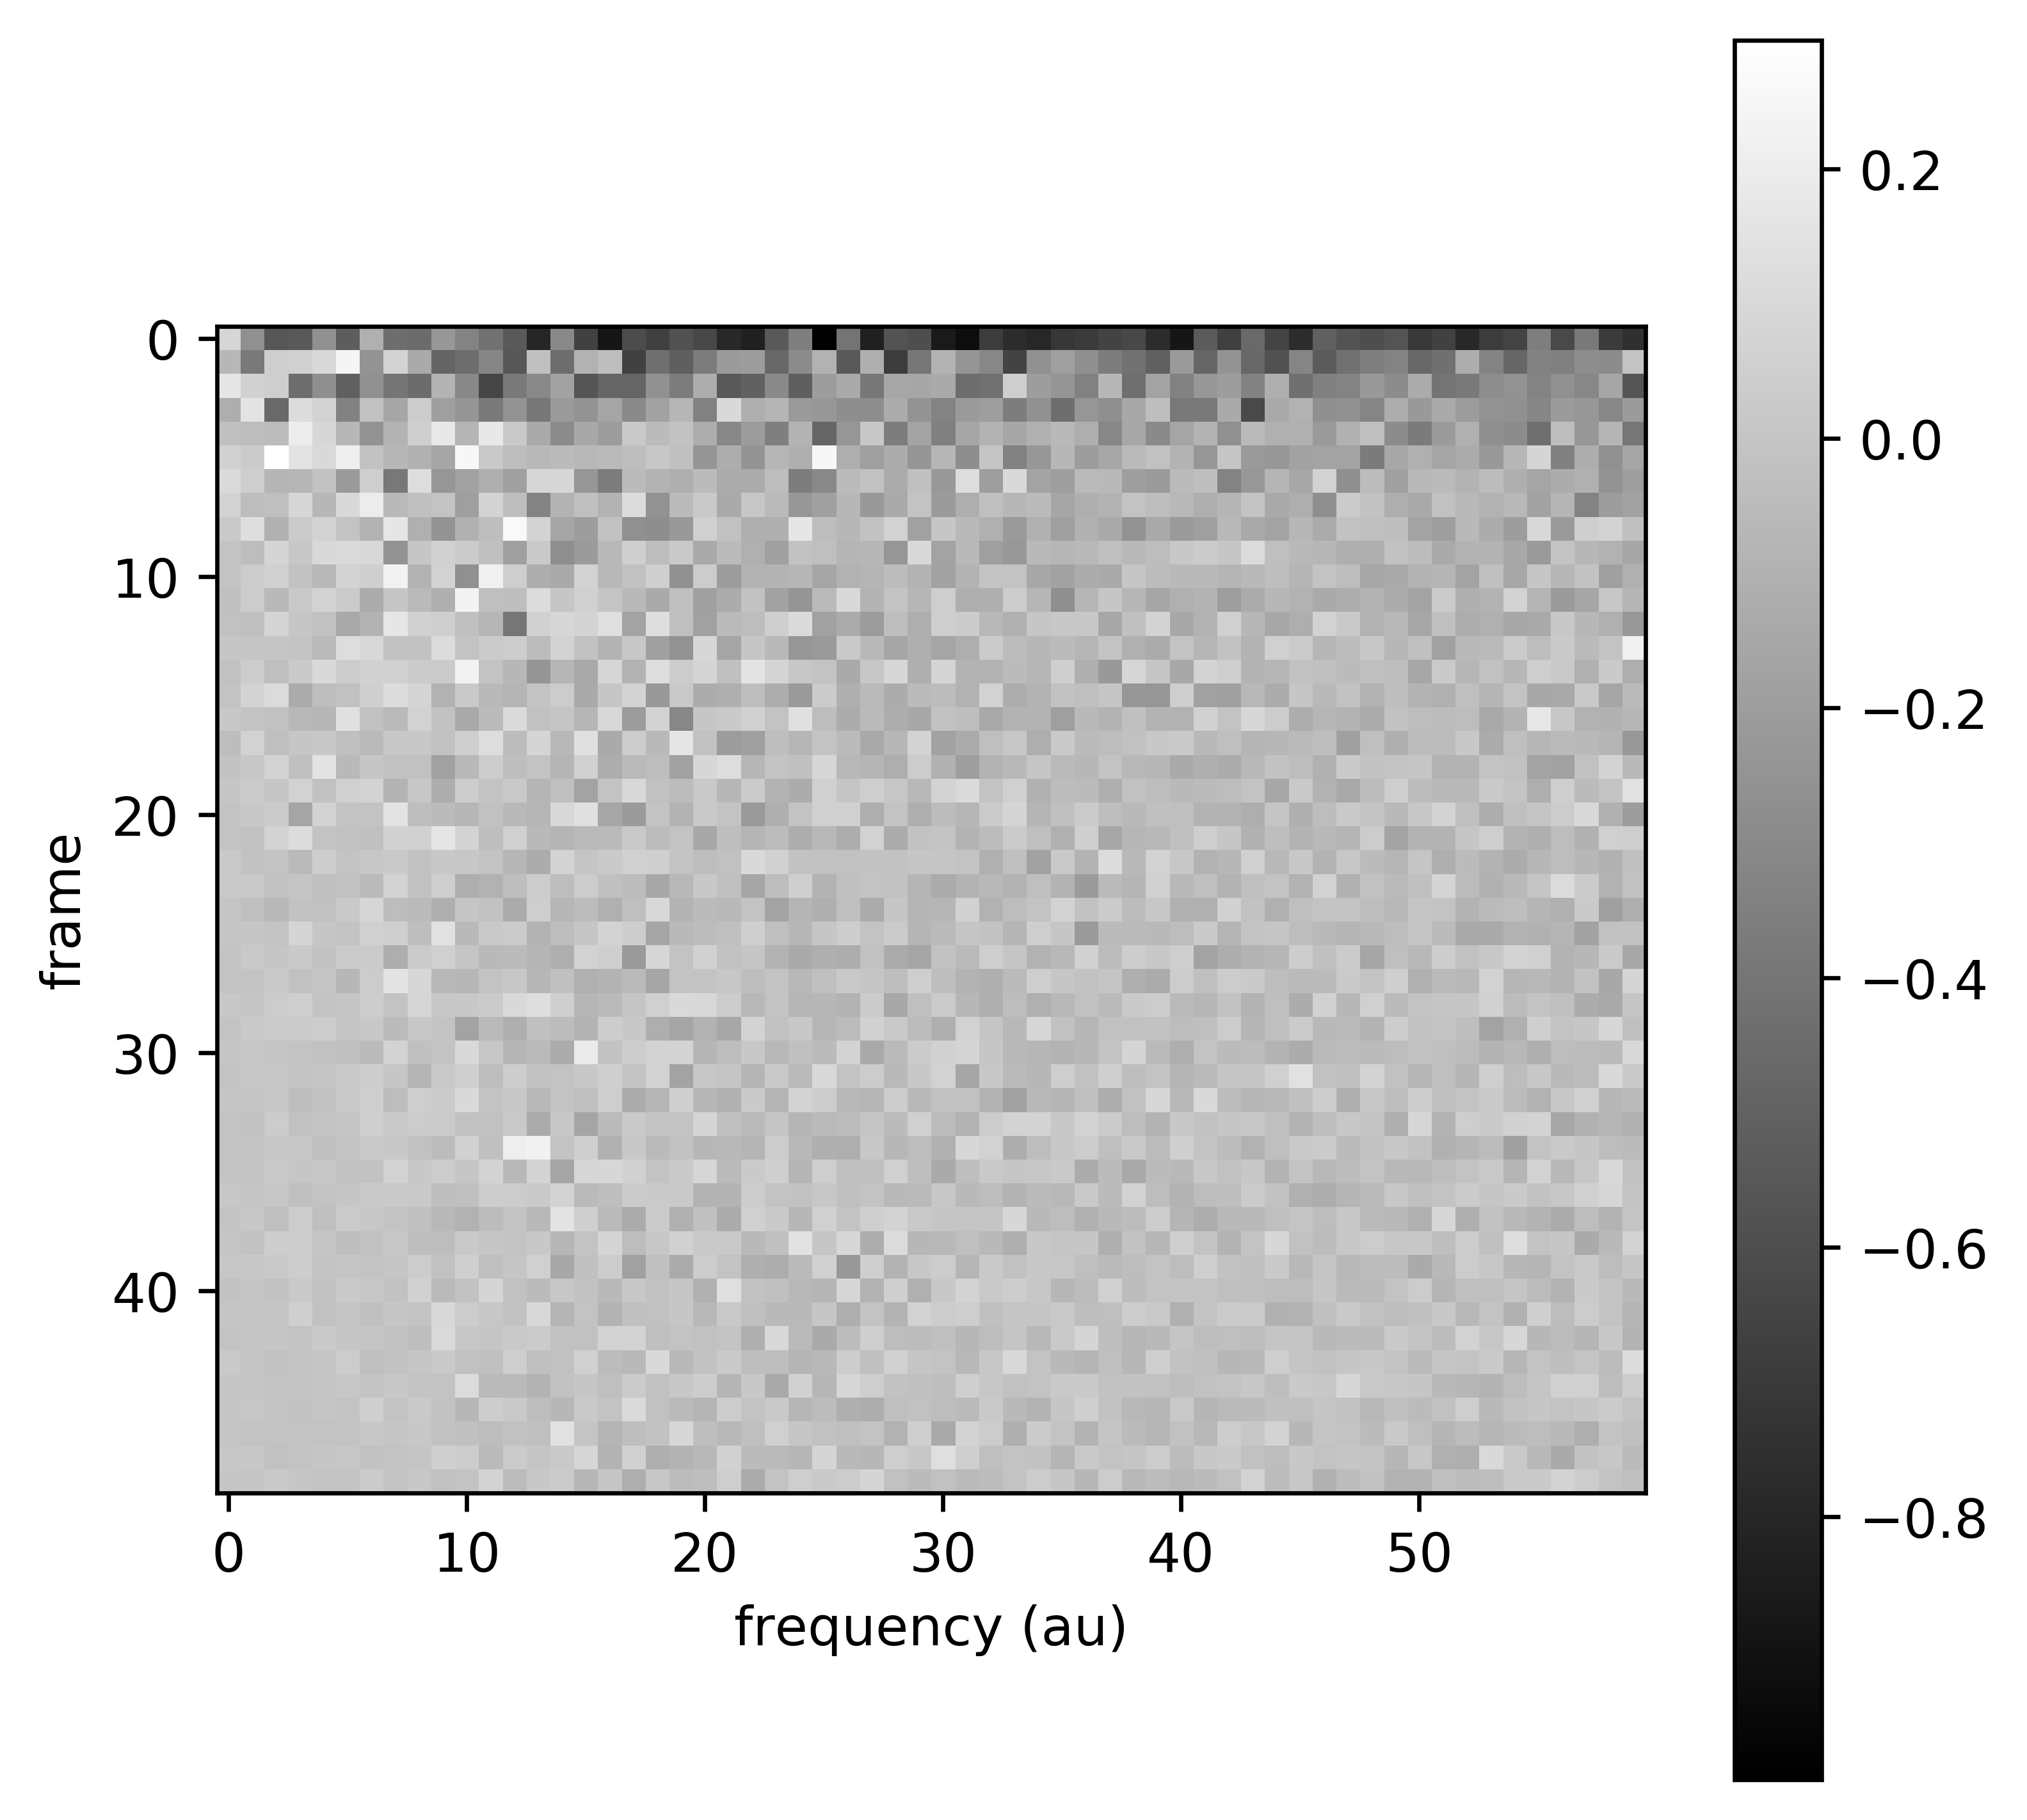

In [86]:
fig = plt.figure(figsize=(6,6),dpi=600)
plt.xlabel('frequency (au)')
plt.ylabel('frame')
plt.imshow(diff_radial_mean[0:data.shape[0]-1,0:60])
plt.colorbar()

In [53]:
radial_mean.shape

(50,)

### prepare CTF

In [21]:
keyword='diff'
ctf_input = './tmp/'+keyword+'.in'
mrcin     = './'+keyword+'.mrc'
ctffile   = './'+keyword+'_ctf.mrc'
mrcutils.prepare_ctffind(ctf_input,mrcin=mrcin,mrcout=ctffile)